In [69]:
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import shapefile
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm

In [70]:
mpl.rcParams['font.size']=10
mpl.rcParams['font.family']='Comic San MS'
mpl.rcParams['axes.labelsize']=8
mpl.rcParams['xtick.labelsize']=6
mpl.rcParams['ytick.labelsize']=6

In [71]:
r=shapefile.Reader("/home/faculty/millbr02/pub/BEL_adm3") #gadm28/gadm28 for general country information
shapes=r.shapes()
records=r.records()

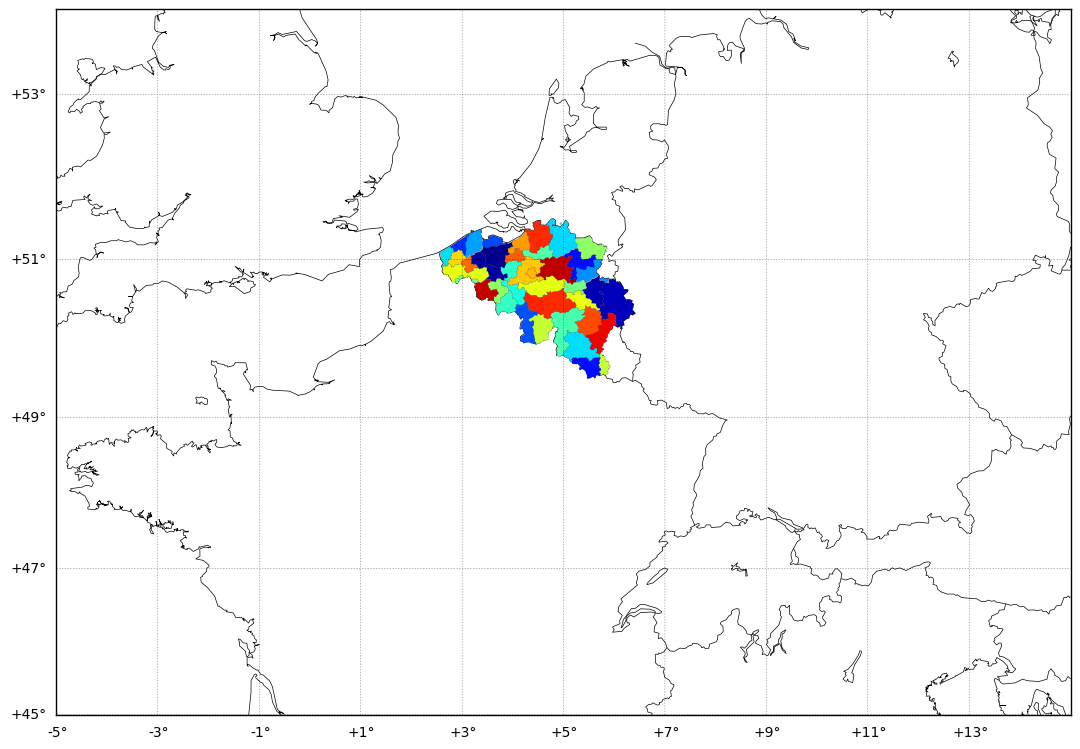

In [72]:
fig=plt.figure(figsize=(11.7,8.3))
#custom adjust of the suplots
plt.subplots_adjust(left=0.05,right=0.95,top=0.9,bottom=.05,wspace=0.15,hspace=0.05)
ax=plt.subplot(111)
#Create a basemap of Europe
x1=-5
x2=15
y1=45
y2=54

m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2)
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(y1,y2,2.),labels=[1,0,0,0],color='black',dashes=[1,1],labelstyle='+/-',linewidth=0.2) # draw parallels
m.drawmeridians(np.arange(x1,x2,2.),labels=[0,0,0,1],color='black',dashes=[1,1],labelstyle='+/-',linewidth=0.2) # draw meridians

for record, shape in zip(records,shapes):
    lons,lats = zip(*shape.points)
    data = np.array(m(lons, lats)).T

    if len(shape.parts) == 1:
        segs = [data,]
    else:
        segs = []
        for i in range(1,len(shape.parts)):
            index = shape.parts[i-1]
            index2 = shape.parts[i]
            segs.append(data[index:index2])
        segs.append(data[index2:])
 
    lines = LineCollection(segs,antialiaseds=(1,))
    lines.set_facecolors(cm.jet(np.random.rand(1)))
    lines.set_edgecolors('k')
    lines.set_linewidth(0.1)
    ax.add_collection(lines)
    
plt.savefig('tutorial10.png',dpi=300)
plt.show()

In [73]:
#csv file: bmiller/pub/Indicators.csv
#shape file: TM_WORLD_BORDER-0.3/...shp

In [74]:
newdata=pd.read_csv('/home/faculty/millbr02/pub/Indicators.csv')

In [75]:
newdata.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [88]:
import plotly.plotly as py
py.sign_in('nguyli03', '31jlkx7yjq')
# import plotly.offline as py
# py.init_notebook_mode()
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

In [77]:
df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


## World Choropleth Map

In [89]:
data = [ dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['GDP (BILLIONS)'],
        text = df['COUNTRY'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'GDP<br>Billions US$'),
      ) ]
layout = dict(
    title = '2014 Global GDP<br>Source:\
            <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)
fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )


High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~nguyli03/0 or inside your plot.ly account where it is named 'd3-world-map'


## United States Choropleth Map

In [90]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['state'] + '<br>' +\
    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
    'Wheat '+df['wheat']+' Corn '+df['corn']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = df['total exports'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout = dict(
        title = '2011 US Agriculture Exports by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )